In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import seaborn as sns
import numpy as np

In [ ]:
movies = pd.read_pickle('/content/drive/MyDrive/Projet 2 - WCS /CSV/fr_movies.pkl')
data_global = pd.read_csv('/content/drive/MyDrive/Projet 2 - WCS /CSV/Extract BOX office global_bo_extracted.csv')
data_global["tconst"] = data_global["ID_extract"]
data_global_movies = pd.merge(data_global, movies,on="tconst", how="inner")
data_global_movies["Top_Box_office_$"] = data_global_movies["Top_Box_office_$"].astype(int)
data_global_movies["genres"] = data_global_movies["genres"].str.replace("\\N","Inconnu")
data_global_movies["list_genre"] = data_global_movies["genres"].str.split(",")
data_global_movies_exploded = data_global_movies.explode("list_genre").reset_index(drop=True)

# Top 5 recette par genre en moyenne

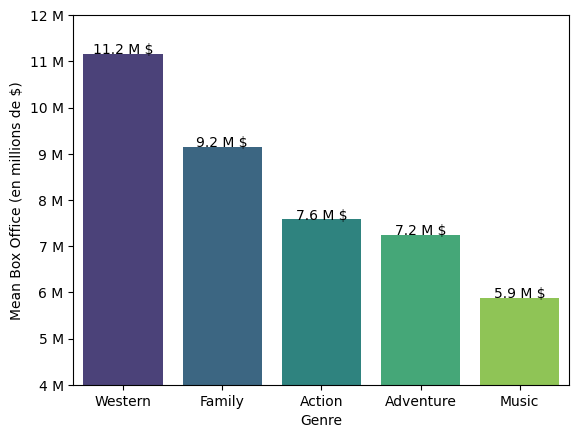

In [ ]:
bo_genre = data_global_movies_exploded.groupby(["list_genre"])["Top_Box_office_$"].mean().round(2)
data_global_movies_exploded['mean_box_office_by_genre'] = data_global_movies_exploded['list_genre'].map(bo_genre)
top_5_genres = bo_genre.nlargest(5)

ax = sns.barplot(x=top_5_genres.index, y=top_5_genres.values, hue=top_5_genres.index, palette="viridis")

# Définissez les limites de l'axe y
ax.set_ylim(bottom=4000000, top=12000000)

# Formatez les étiquettes de l'axe y en millions

ax.ticklabel_format(style='plain', axis='y')
formatter0 = EngFormatter()
ax.yaxis.set_major_formatter(formatter0)
# Ajoutez les valeurs de y au-dessus de chaque barre
for i, genre in enumerate(top_5_genres.index):
    ax.text(i, top_5_genres[genre], f"{top_5_genres[genre]/1000000:.1f} M $", ha='center')

# Définissez les limites de l'axe x
plt.xlabel('Genre')
plt.ylabel('Mean Box Office (en millions de $)')
plt.show()

# Top 5 genre en recettes cumulées

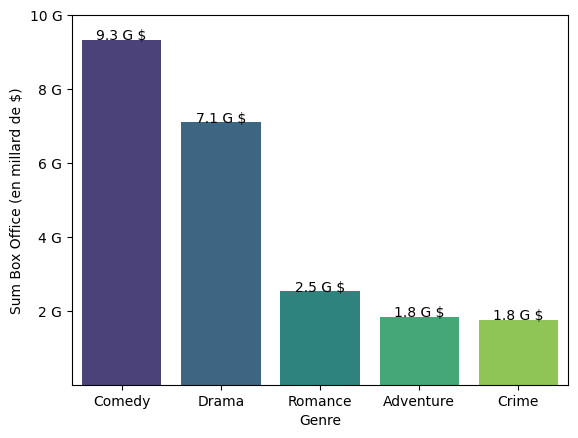

In [ ]:
sum_genre = data_global_movies_exploded.groupby(["list_genre"])["Top_Box_office_$"].sum().round(2)
top_5_sum = sum_genre.nlargest(5)
ax = sns.barplot(x=top_5_sum.index, y=top_5_sum.values, hue=top_5_sum.index, palette="viridis")

# Définissez les limites de l'axe y
ax.set_ylim(bottom=4000000, top=10000000000)

# Formatez les étiquettes de l'axe y en millions

ax.ticklabel_format(style='plain', axis='y')
formatter0 = EngFormatter()
ax.yaxis.set_major_formatter(formatter0)
# Ajoutez les valeurs de y au-dessus de chaque barre
for i, genre in enumerate(top_5_sum.index):
    ax.text(i, top_5_sum[genre], f"{top_5_sum[genre]/1000000000:.1f} G $", ha='center')

# Définissez les limites de l'axe x
plt.xlabel('Genre')
plt.ylabel('Sum Box Office (en millard de $)')
plt.show()

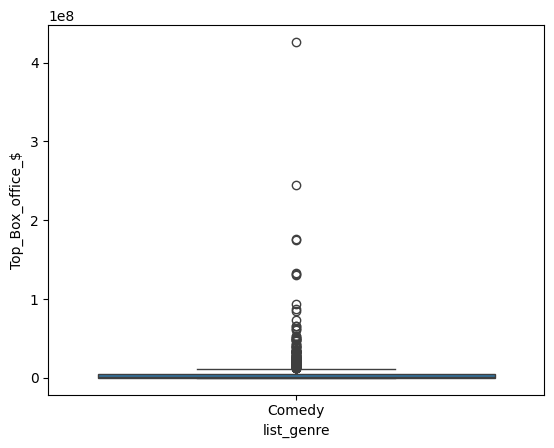

In [ ]:
ax = sns.boxplot(x=data_global_movies_exploded["list_genre"][data_global_movies_exploded["list_genre"]=="Comedy"], y=data_global_movies_exploded["Top_Box_office_$"])

# Top 5 meilleurs film francophones par recette globale

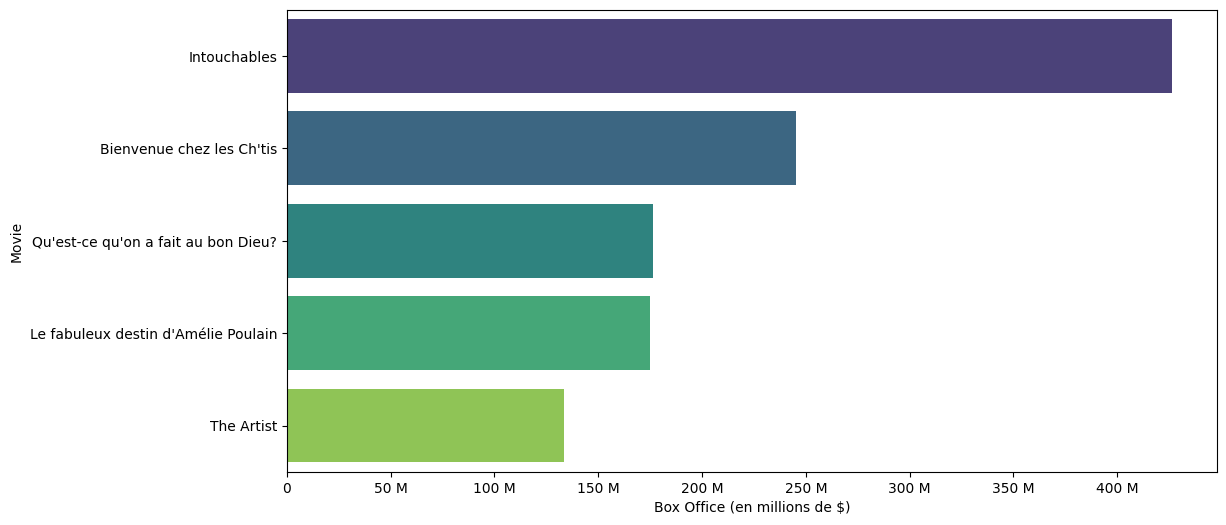

In [ ]:
top_5_movies = data_global_movies[["originalTitle","Top_Box_office_$"]].nlargest(5, columns="Top_Box_office_$")

plt.figure(figsize=(12, 6))  # Définissez la taille du graphique en pouces
ax = sns.barplot(y="originalTitle", x="Top_Box_office_$", data=top_5_movies, palette="viridis", hue="originalTitle")

# Faites pivoter les étiquettes de l'axe des x pour réduire leur taille


ax.ticklabel_format(style='plain', axis='x')
formatter0 = EngFormatter()
ax.xaxis.set_major_formatter(formatter0)

# Ajoutez les annotations aux barres du graphique


plt.xlabel('Box Office (en millions de $)')
plt.ylabel('Movie')
plt.show()


# Top 5 genre par moyenne de note

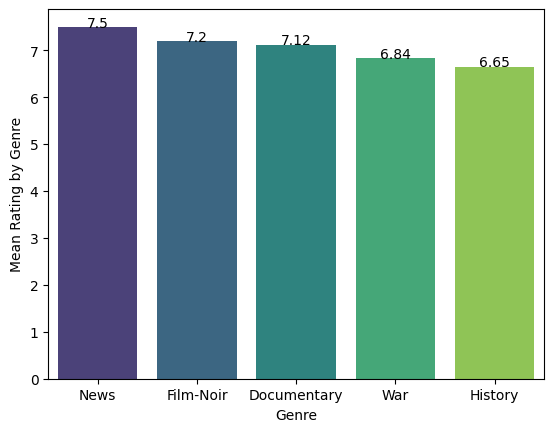

In [ ]:
rating_genre = data_global_movies_exploded.groupby(["list_genre"])["averageRating"].mean().round(2)
data_global_movies_exploded['mean_rating_by_genre'] = data_global_movies_exploded['list_genre'].map(bo_genre)
top_5_genres_rating = rating_genre.nlargest(5)
ax = sns.barplot(x=top_5_genres_rating.index, y=top_5_genres_rating.values, hue=top_5_genres_rating.index, palette="viridis")


# Formatez les étiquettes de l'axe y en millions

ax.ticklabel_format(style='plain', axis='y')
formatter0 = EngFormatter()

# Ajoutez les valeurs de y au-dessus de chaque barre
for i, genre in enumerate(top_5_genres_rating.index):
    ax.text(i, top_5_genres_rating[genre], f"{top_5_genres_rating[genre]}", ha='center')

# Définissez les limites de l'axe x
plt.xlabel('Genre')
plt.ylabel('Mean Rating by Genre')
plt.show()

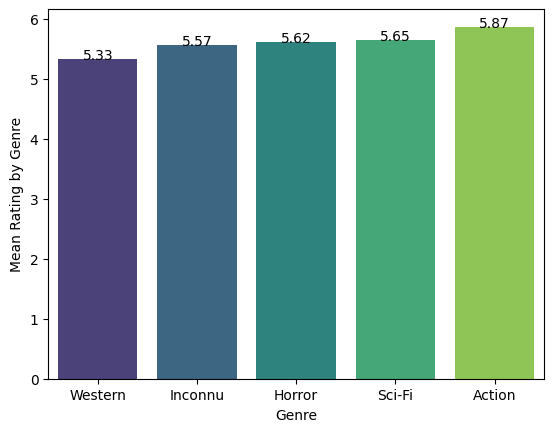

In [ ]:
flop_5_genres_rating = rating_genre.nsmallest(5)
ax = sns.barplot(x=flop_5_genres_rating.index, y=flop_5_genres_rating.values, hue=flop_5_genres_rating.index, palette="viridis")


# Formatez les étiquettes de l'axe y en millions

ax.ticklabel_format(style='plain', axis='y')
formatter0 = EngFormatter()

# Ajoutez les valeurs de y au-dessus de chaque barre
for i, genre in enumerate(flop_5_genres_rating.index):
    ax.text(i, flop_5_genres_rating[genre], f"{flop_5_genres_rating[genre]}", ha='center')

# Définissez les limites de l'axe x
plt.xlabel('Genre')
plt.ylabel('Mean Rating by Genre')
plt.show()

# Top 5 genre par valeur médianne des recettes

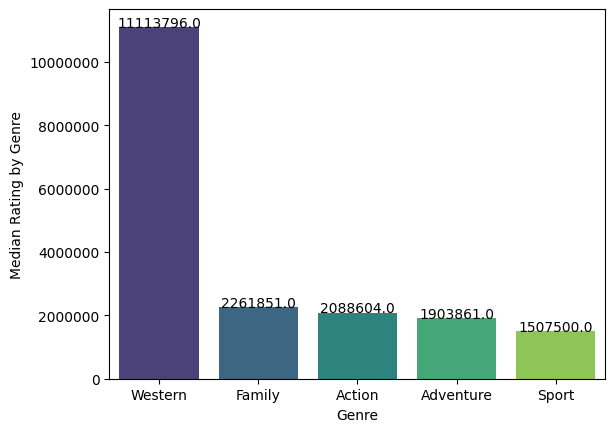

In [ ]:
bo_genre = data_global_movies_exploded.groupby(["list_genre"])["Top_Box_office_$"].median().round(0)
top_5_genres_bo = bo_genre.nlargest(5)
ax = sns.barplot(x=top_5_genres_bo.index, y=top_5_genres_bo.values, hue=top_5_genres_bo.index, palette="viridis")


# Formatez les étiquettes de l'axe y en millions

ax.ticklabel_format(style='plain', axis='y')
formatter0 = EngFormatter()

# Ajoutez les valeurs de y au-dessus de chaque barre
for i, genre in enumerate(top_5_genres_bo.index):
    ax.text(i, top_5_genres_bo[genre], f"{top_5_genres_bo[genre]}", ha='center')

# Définissez les limites de l'axe x
plt.xlabel('Genre')
plt.ylabel('Median Rating by Genre')
plt.show()

In [ ]:
df_semaine = pd.read_csv('/content/drive/MyDrive/Projet 2 - WCS /CSV/bo_office_semaine.csv')
df_semaine = df_semaine.fillna("Autre").drop_duplicates(subset="ID")

In [ ]:
df_semaine['Pays'] = np.where(df_semaine["Pays d'origine"] != "Autre", 'France', df_semaine["Pays d'origine"])
df_semaine['Titre']=  df_semaine['Titre'].replace('Teaser VF', '', regex=True)

# Top 3 meilleur film par entrée sur la première semaine

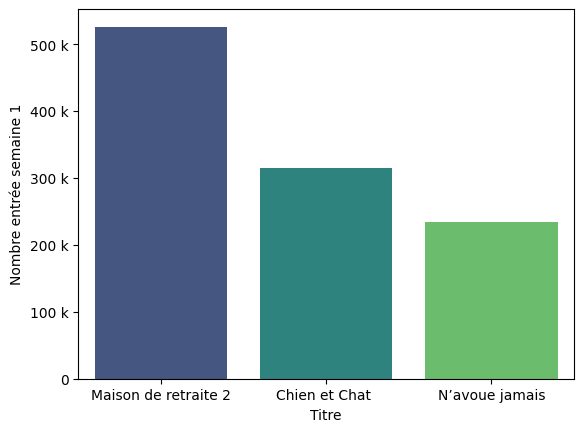

In [ ]:
filtre = df_semaine["Nb semaine de diffusion"]==1
df_semaine_1 = df_semaine[filtre].sort_values(by="Nombre d'entrées semaine",ascending=False)
df_semaine_1_france = df_semaine_1[df_semaine_1["Pays"]=="France"]
df_semaine_1_france[["Titre","Nombre d'entrées semaine"]].head(3)
ax = sns.barplot(data = df_semaine_1_france[["Titre","Nombre d'entrées semaine"]].head(3), x="Titre",y="Nombre d'entrées semaine",
            palette="viridis", hue ="Titre")
formatter0 = EngFormatter()
ax.yaxis.set_major_formatter(formatter0)
plt.xlabel('Titre')
plt.ylabel('Nombre entrée semaine 1')
plt.show()

# Top 3 film en nombre d'entrées cumulées

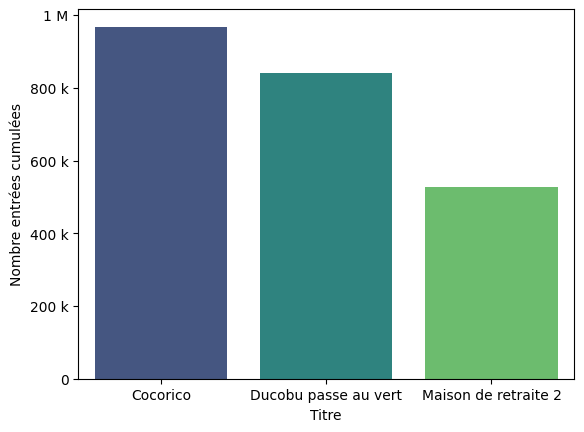

In [ ]:
df_semaine = df_semaine.sort_values(by="Nombre entrées cumulées",ascending=False)
df_semaine_fr = df_semaine[df_semaine["Pays"]=="France"]
df_semaine_fr[["Titre","Nombre entrées cumulées"]].head(3)

ax = sns.barplot(data = df_semaine_fr[["Titre","Nombre entrées cumulées"]].head(3), x="Titre",y="Nombre entrées cumulées",
            palette="viridis", hue ="Titre")
formatter0 = EngFormatter()
ax.yaxis.set_major_formatter(formatter0)
plt.xlabel('Titre')
plt.ylabel('Nombre entrées cumulées')
plt.show()